# Customer habits of [Ford GoBike System](https://www.fordgobike.com/) in 2018

<span style="color: gray; font-size:1em;">Yousef Al-mutairi</span>
<br><span style="color: gray; font-size:1em;">Jan-2021</span>

## Investigation Overview

> i wanted to analyize the customer behavior of the bay Area bike rent system when biker are in high demand

## Dataset Overview

> this document explores the Ford GoBike's trip data for public

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('enhanced_master_file.csv')

In [3]:
# calculating % split for the user type
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / df_clean['bike_id'].count()
subscriber_proportion = subscriber / df_clean['bike_id'].count()

## Individual trips by subscription type

> Ford GoBike system currently Offers 3 types of subscribtions 
<br>
 1 - Single Ride : Access pass (24h or 72h) 
 <br>

 2 - Monthly Membership : rent bike monthly 
 <br>

 3 - casual Riders : who uses the bike ocasionally rental .


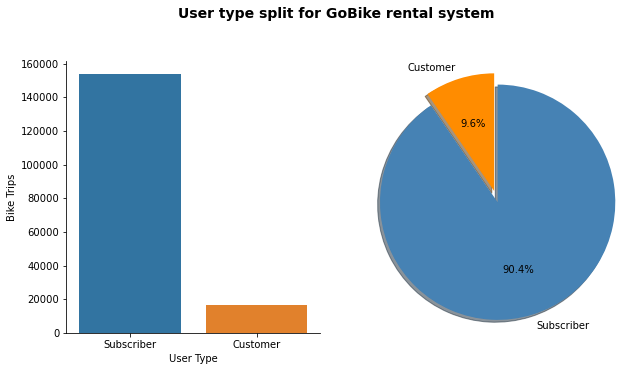

In [4]:
plt.figure(figsize = [10, 5])
plt.rc('axes.spines', top = False, right = False)

# code for the bar chart
plt.subplot(1, 2, 1)

graph_plt = sns.countplot(data=df_clean, x="user_type", order=df_clean.user_type.value_counts().index)
graph_plt.set_xlabel('User Type')
graph_plt.set_ylabel('Bike Trips')

# code for the pie chart
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User type split for GoBike rental system', y=1.03, fontsize=14, fontweight='semibold');

## Daily and weekly habits by subscription type

observations 

  - Customers
    1 - weekdays : most bike rides ocurr around 4pm-6pm and 7am-9am , with peak on thursday
    1 - weekends : most bike rides occurr around 1pm-4pm with peak on sundays .

  - subscribers
    1 - weekdays : most bike rides ocurr around 8-9am and 4-6pm peak on thursday .
    2 - weekends : rarely but peak on saturday .

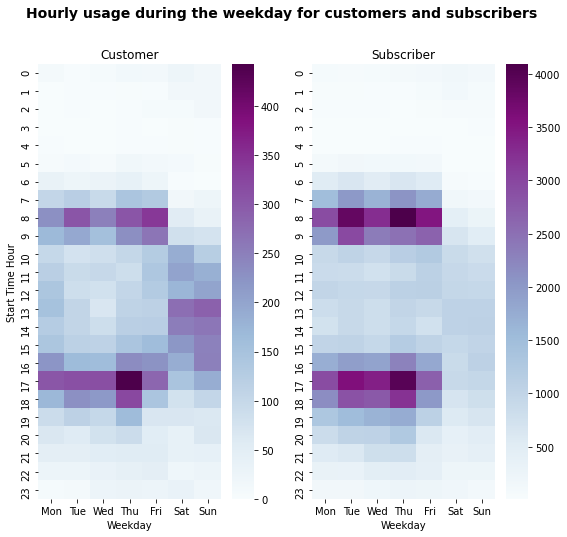

In [5]:
# Setting the weekday order
df_clean['start_time_weekday'] = pd.Categorical(df_clean['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df_clean.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_customer, cmap="BuPu")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_subscriber, cmap="BuPu")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

## Lenght of trips by subscription type

> plotting a heatmap can describe the behavior of rental of bikes , we can see that for customers some of them uses the bikes for work because of rental time interval but they also rent bikes and take more time at trips so there is a small probablity of using bike as a customer to go to work .
in the other hand it shows that subscribers really uses the bikes for only work or school , as noticed from the intrevals when they rent a bike , and its much smalle rate of rent at weekends than weekdays so subscribers really hated bikes they take the weekend as off-days of riding bikes .

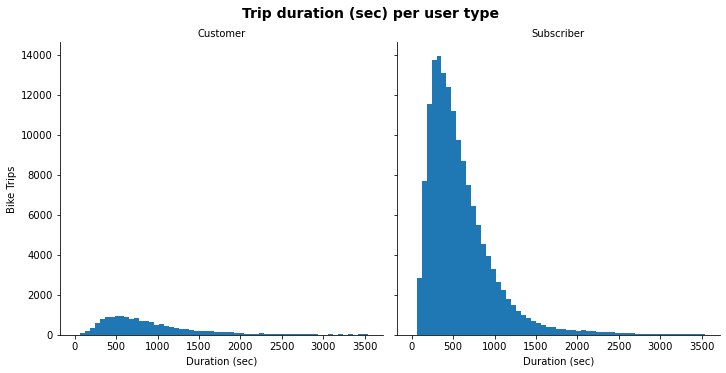

In [6]:
# code for the (histogram) duration (sec) distribution per user type

base_color = sns.color_palette()[0]

graph_plt = sns.FacetGrid(df_clean, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 3600,60)
graph_plt.map(plt.hist, "duration_sec", color=base_color, bins=bin_edges)
graph_plt.set_axis_labels("Duration (sec)", "Bike Trips")
graph_plt.set_titles(col_template = '{col_name}')
graph_plt.fig.suptitle('Trip duration (sec) per user type', y=1.03, fontsize=14, fontweight='semibold');

## Summary
At the end , renting a bike is fantastic , the results are showing a big effort and time control , also bikes are healther and eco-friendly , a good way for moving around small blocks , having good time exploring the city roads , a short ride with a good urban weather . 

mainly there is 2 types of clients
 
 1 - subscribers : mainly workers or students because of their rent time between 7-9am and 4-6pm
 2 - customer(casual rider) : have much rent times than subscribers at weekend .